<a href="https://colab.research.google.com/github/Lipun101/MAGIC-Gamma-Telescope/blob/main/MAGIC_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MAGIC Gamma Telescope**

**Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope**

**Dataset Characteristics**: Multivariate\
**Subject Area**: Physics and Chemistry\
**Associated Tasks** : Classification\
**Feature Type** : Real\
**Instances** : 19020\
**Features** : 10





**Dataset Information**:\
The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background).


**Features Description :**

fLength:	major axis of ellipse\
fWidth:		minor axis of ellipse\
fSize:	10-log of sum of content of all pixels\
fConc:		ratio of sum of two highest pixels over fSize\
fConc1:		ratio of highest pixel over fSize\
fAsym	:	distance from highest pixel to center, projected onto major axis\
fM3Long	:	3rd root of third moment along major axis\
fM3Trans:		3rd root of third moment along minor axis\
fAlpha:		angle of major axis with vector to origin\
fDist	:	distance from origin to center of ellipse

In [42]:
# importing all the required dependencies.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

In [43]:
data = pd.read_csv("/content/drive/MyDrive/magic04_gamma.csv")
data.head()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [44]:
print('dataset shape: ', data.shape)

dataset shape:  (19020, 12)


In [45]:
data.columns

Index(['Unnamed: 0', 'fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',
       'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')

In [46]:
print("observing the basic information :")
data.info()

observing the basic information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19020 non-null  int64  
 1   fLength     19020 non-null  float64
 2   fWidth      19020 non-null  float64
 3   fSize       19020 non-null  float64
 4   fConc       19020 non-null  float64
 5   fConc1      19020 non-null  float64
 6   fAsym       19020 non-null  float64
 7   fM3Long     19020 non-null  float64
 8   fM3Trans    19020 non-null  float64
 9   fAlpha      19020 non-null  float64
 10  fDist       19020 non-null  float64
 11  class       19020 non-null  object 
dtypes: float64(10), int64(1), object(1)
memory usage: 1.7+ MB


**Data cleaning process**

In [47]:
# Checking for null values
null_values = data.isnull().sum()
print(null_values)

Unnamed: 0    0
fLength       0
fWidth        0
fSize         0
fConc         0
fConc1        0
fAsym         0
fM3Long       0
fM3Trans      0
fAlpha        0
fDist         0
class         0
dtype: int64


In [48]:
# Delete a column
data.drop('Unnamed: 0', axis=1)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


# **Performing exploratory data analysis (EDA).**

In [49]:
# Get summary statistics
summary_stats = data.describe()
print(summary_stats)

         Unnamed: 0       fLength        fWidth         fSize         fConc  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean    9509.500000     53.250154     22.180966      2.825017      0.380327   
std     5490.745396     42.364855     18.346056      0.472599      0.182813   
min        0.000000      4.283500      0.000000      1.941300      0.013100   
25%     4754.750000     24.336000     11.863800      2.477100      0.235800   
50%     9509.500000     37.147700     17.139900      2.739600      0.354150   
75%    14264.250000     70.122175     24.739475      3.101600      0.503700   
max    19019.000000    334.177000    256.382000      5.323300      0.893000   

             fConc1         fAsym       fM3Long      fM3Trans        fAlpha  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean       0.214657     -4.331745     10.545545      0.249726     27.645707   
std        0.110511     59.206062     51.000118    

# **Distribution Analysis:**

**Visualizing the distribution of each feature using histograms or density plots.**

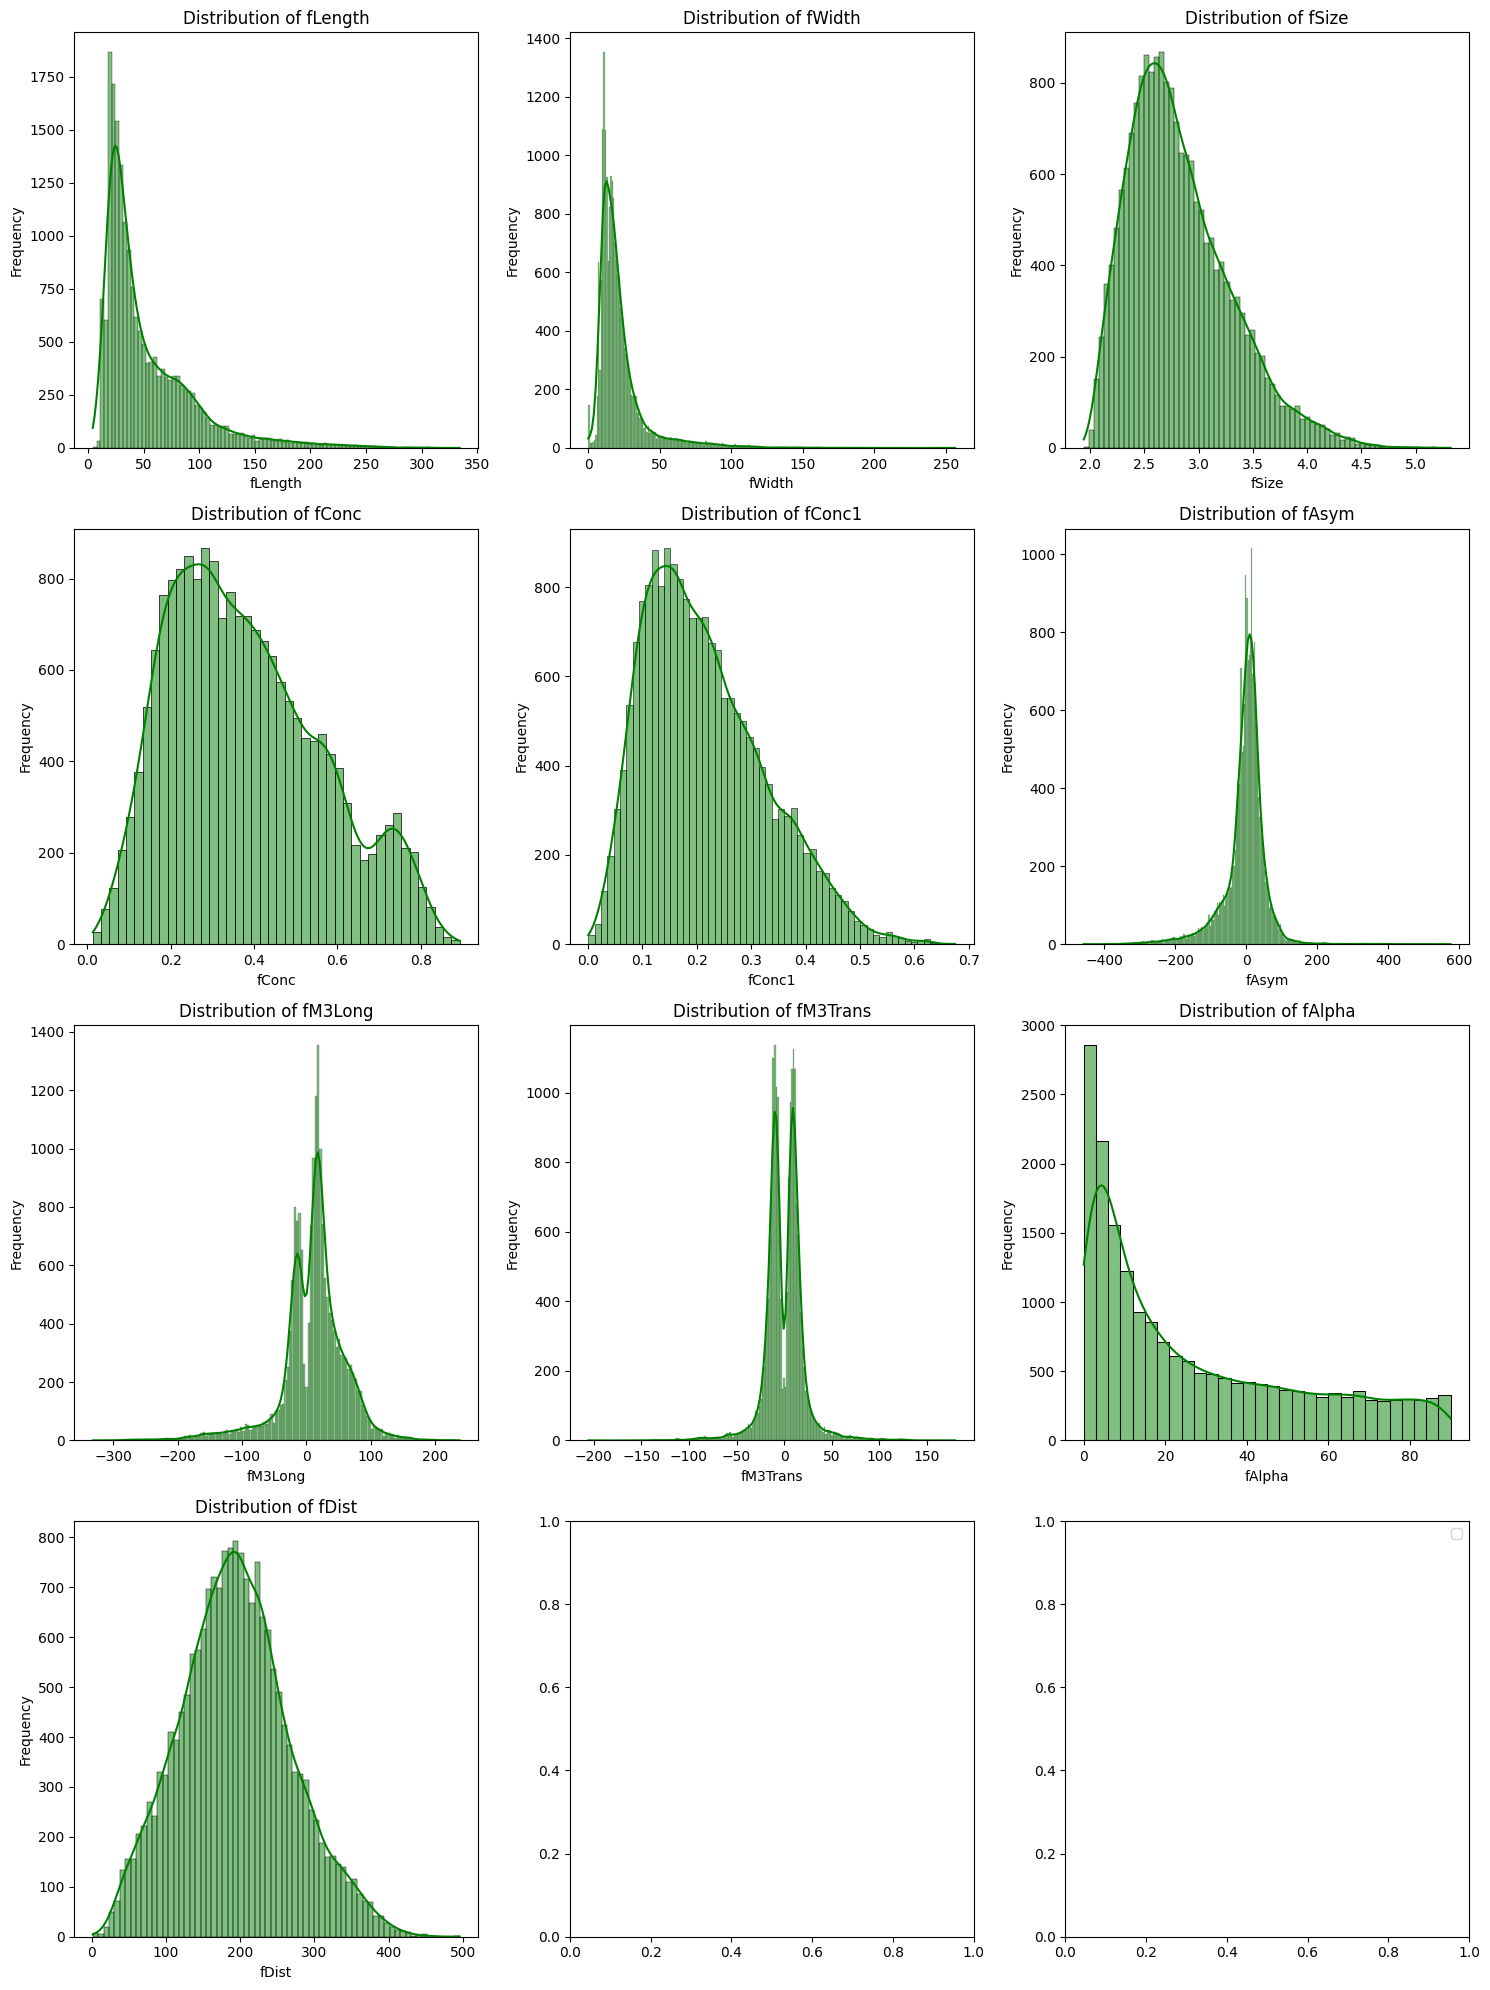

In [50]:
# Visualize the distribution of each feature using histograms and density plots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

axes = axes.flatten()
# plt.suptitle('Visualizing the distribution of each feature using histograms', fontsize=15, fontweight='bold')
for i, col in enumerate(data.columns[1:-1]):  # Excluding the index and class column
    sns.histplot(data[col], ax=axes[i], kde=True, color = 'green')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


**Compare the distributions of features for gamma rays (g) and hadrons (h) using histograms plots.**

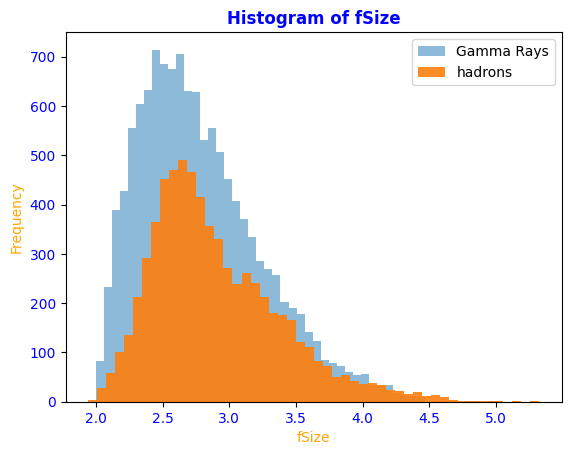

In [51]:
# first of all filtering the data

def test(feature):
  gamma_rays =  data[data['class']== 'g']
  hadrons =  data[data['class']== 'h']

  plt.hist(gamma_rays[feature], bins=50, alpha=0.5, label='Gamma Rays')
  plt.hist(hadrons[feature], bins=50, alpha=0.9, label='hadrons')
  plt.title('Histogram of ' + feature, weight = 'bold', color = 'blue')
  plt.xlabel(feature, color = 'orange')
  plt.ylabel('Frequency', color = 'orange')
  plt.xticks(color = 'blue')
  plt.yticks(color = 'blue')
  plt.legend()
  plt.show()

test('fSize')

# This function will Compare the distributions of features for gamma rays (g) and hadrons (h) as per the parameter
# here parameters are the different features to predict wheter its gamma rays or hadrons



# **Feature Relationships:**

**Analyze the relationship between fLength and fWidth using a scatter plot, colored by class.**


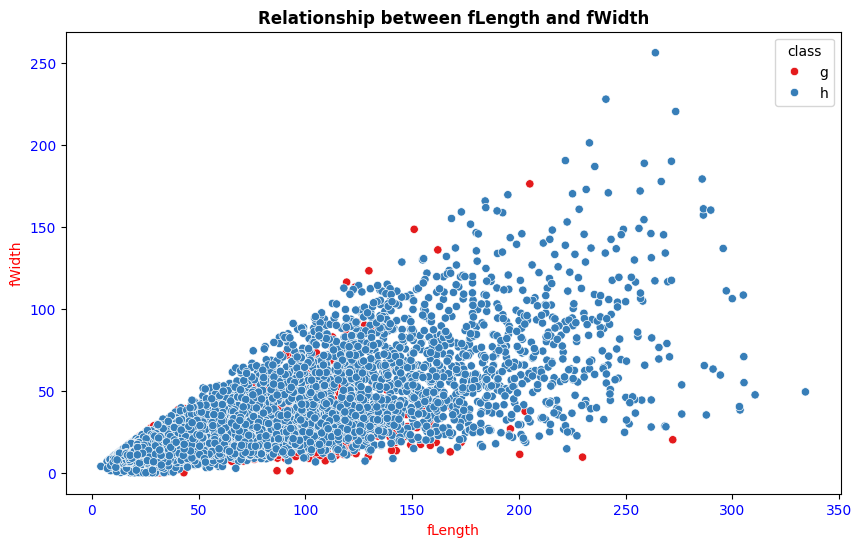

In [52]:
# Create a scatter plot to visualize the relationship between fLength and fWidth, colored by class

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='fLength', y='fWidth', hue='class', palette='Set1')
plt.title('Relationship between fLength and fWidth', weight = 'bold')
plt.xlabel('fLength', color = 'red')
plt.xticks(color = 'blue')
plt.yticks(color = 'blue')
plt.ylabel('fWidth', color = 'red')
plt.show()


* The points are heavily overlapping between the classes, it may indicate that fLength and fWidth alone are not sufficient to distinguish between gamma rays and hadrons.
* The points form an upward-sloping pattern, it suggests a positive correlation between fLength and fWidth. This means that as fLength increases, fWidth tends to increase as well. This indicates a positive correlation.

**Investigate the relationship between fSize and fConc using a scatter plot, colored by class.**

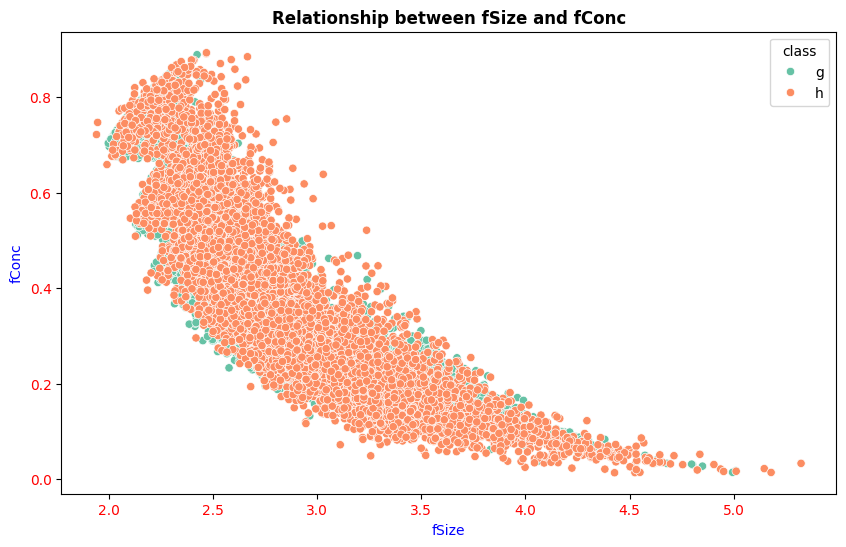

In [53]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = data, x= 'fSize', y = 'fConc', hue='class', palette='Set2')
plt.title('Relationship between fSize and fConc', weight = 'bold')
plt.xlabel('fSize', color = 'blue')
plt.ylabel('fConc', color = 'blue')
plt.xticks(color = 'red')
plt.yticks(color = 'red')
plt.show()

* The points are heavily overlapping between the classes, it may indicate that  fSize and fConc  alone are not sufficient to distinguish between gamma rays and hadrons.
* A downward-sloping pattern would indicate a negative correlation, meaning as fsize increases, fConc tends to decrease.

# **Class Distribution:**

**Visualize the class distribution using a bar plot or pie chart.**

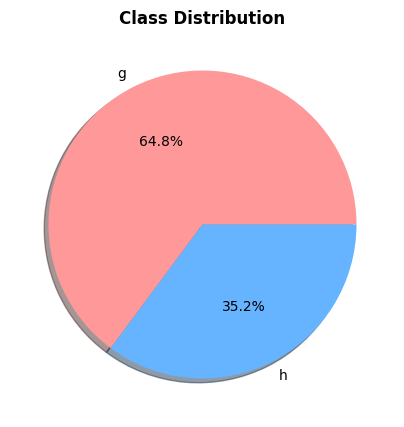

In [54]:
# Count the number of instances in each class
class_counts = data['class'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', shadow=True, colors= ['#ff9999', '#66b3ff'])
plt.title('Class Distribution', weight = 'bold')
plt.show()

# **Box Plots for Feature Comparison:**

**Create box plots to compare the distributions of each feature between the two classes (g and h).**


<ipython-input-55-223e739e3845>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=data, palette='Set2')
<ipython-input-55-223e739e3845>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=data, palette='Set2')
<ipython-input-55-223e739e3845>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=data, palette='Set2')
<ipython-input-55-223e739e3845>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

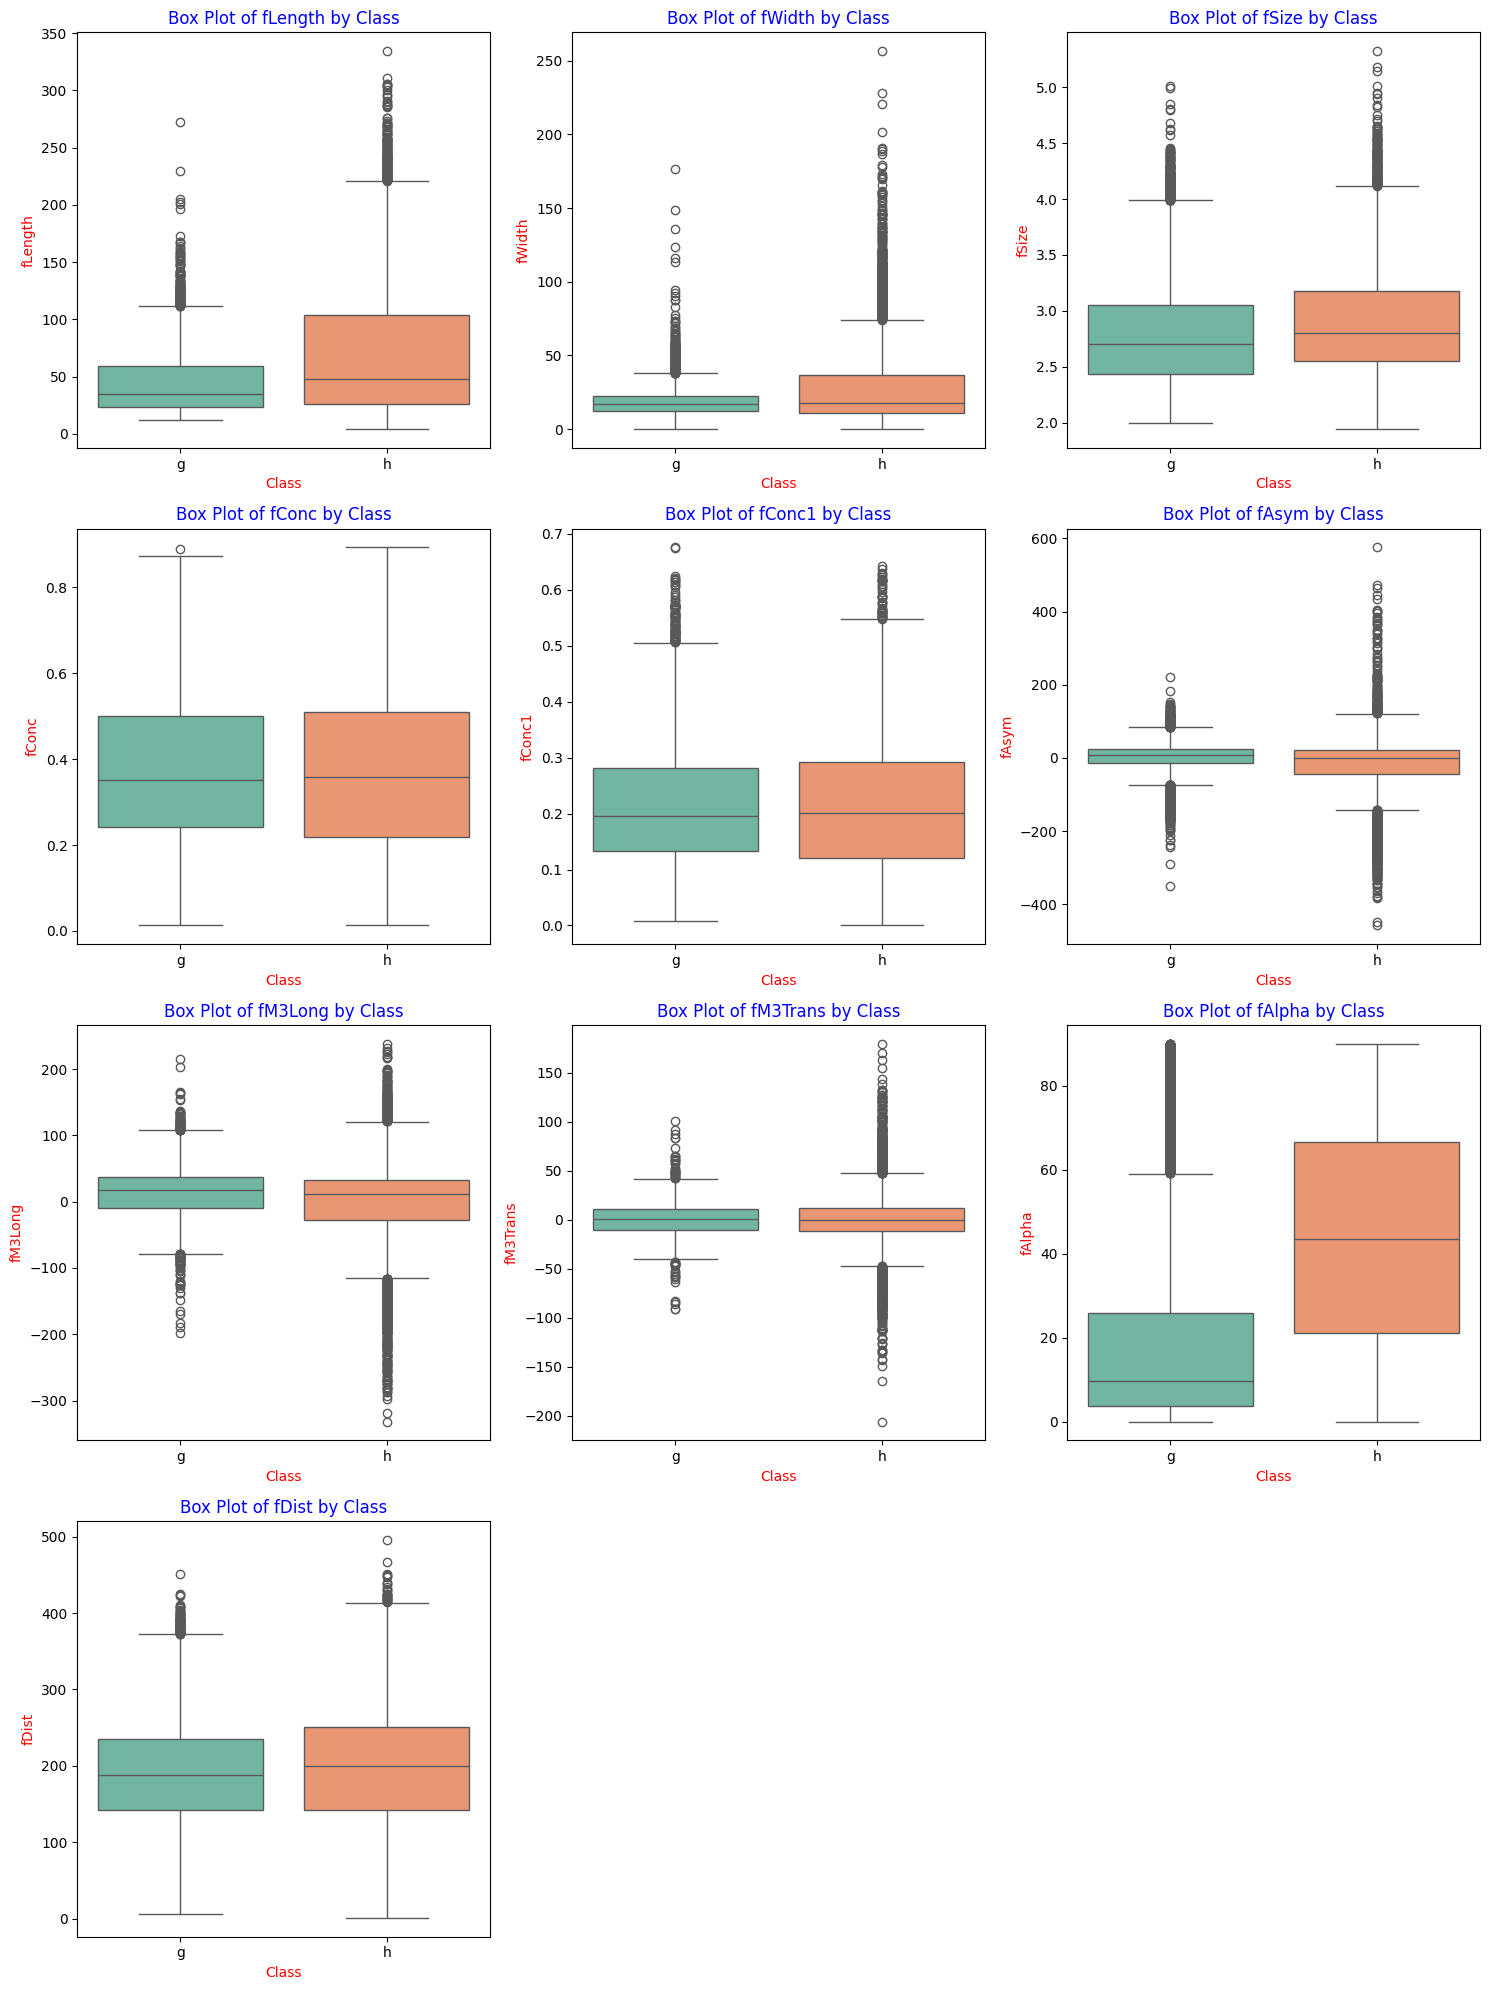

In [55]:
# List of features to create box plots for
features = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',
            'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']

# Set up the matplotlib figure
plt.figure(figsize=(15, 20))

# Create a box plot for each feature
for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x='class', y=feature, data=data, palette='Set2')
    plt.title(f'Box Plot of {feature} by Class', color = 'blue')
    plt.xlabel('Class', color = 'red')
    plt.ylabel(feature, color = 'red')

plt.tight_layout()
plt.show()


* If the median (central line in the box) differs significantly between the two classes for a feature, it suggests that the feature might be important for distinguishing between the classes.
* The spread (interquartile range) and presence of outliers can give insights into the variability of the feature within each class.

# **Outlier Detection:**

**Use box plots or scatter plots to identify potential outliers in the dataset.**

<ipython-input-56-18f410fa2cf4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=feature, data=data, palette='Set1')
<ipython-input-56-18f410fa2cf4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=feature, data=data, palette='Set1')
<ipython-input-56-18f410fa2cf4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=feature, data=data, palette='Set1')
<ipython-input-56-18f410fa2cf4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `lege

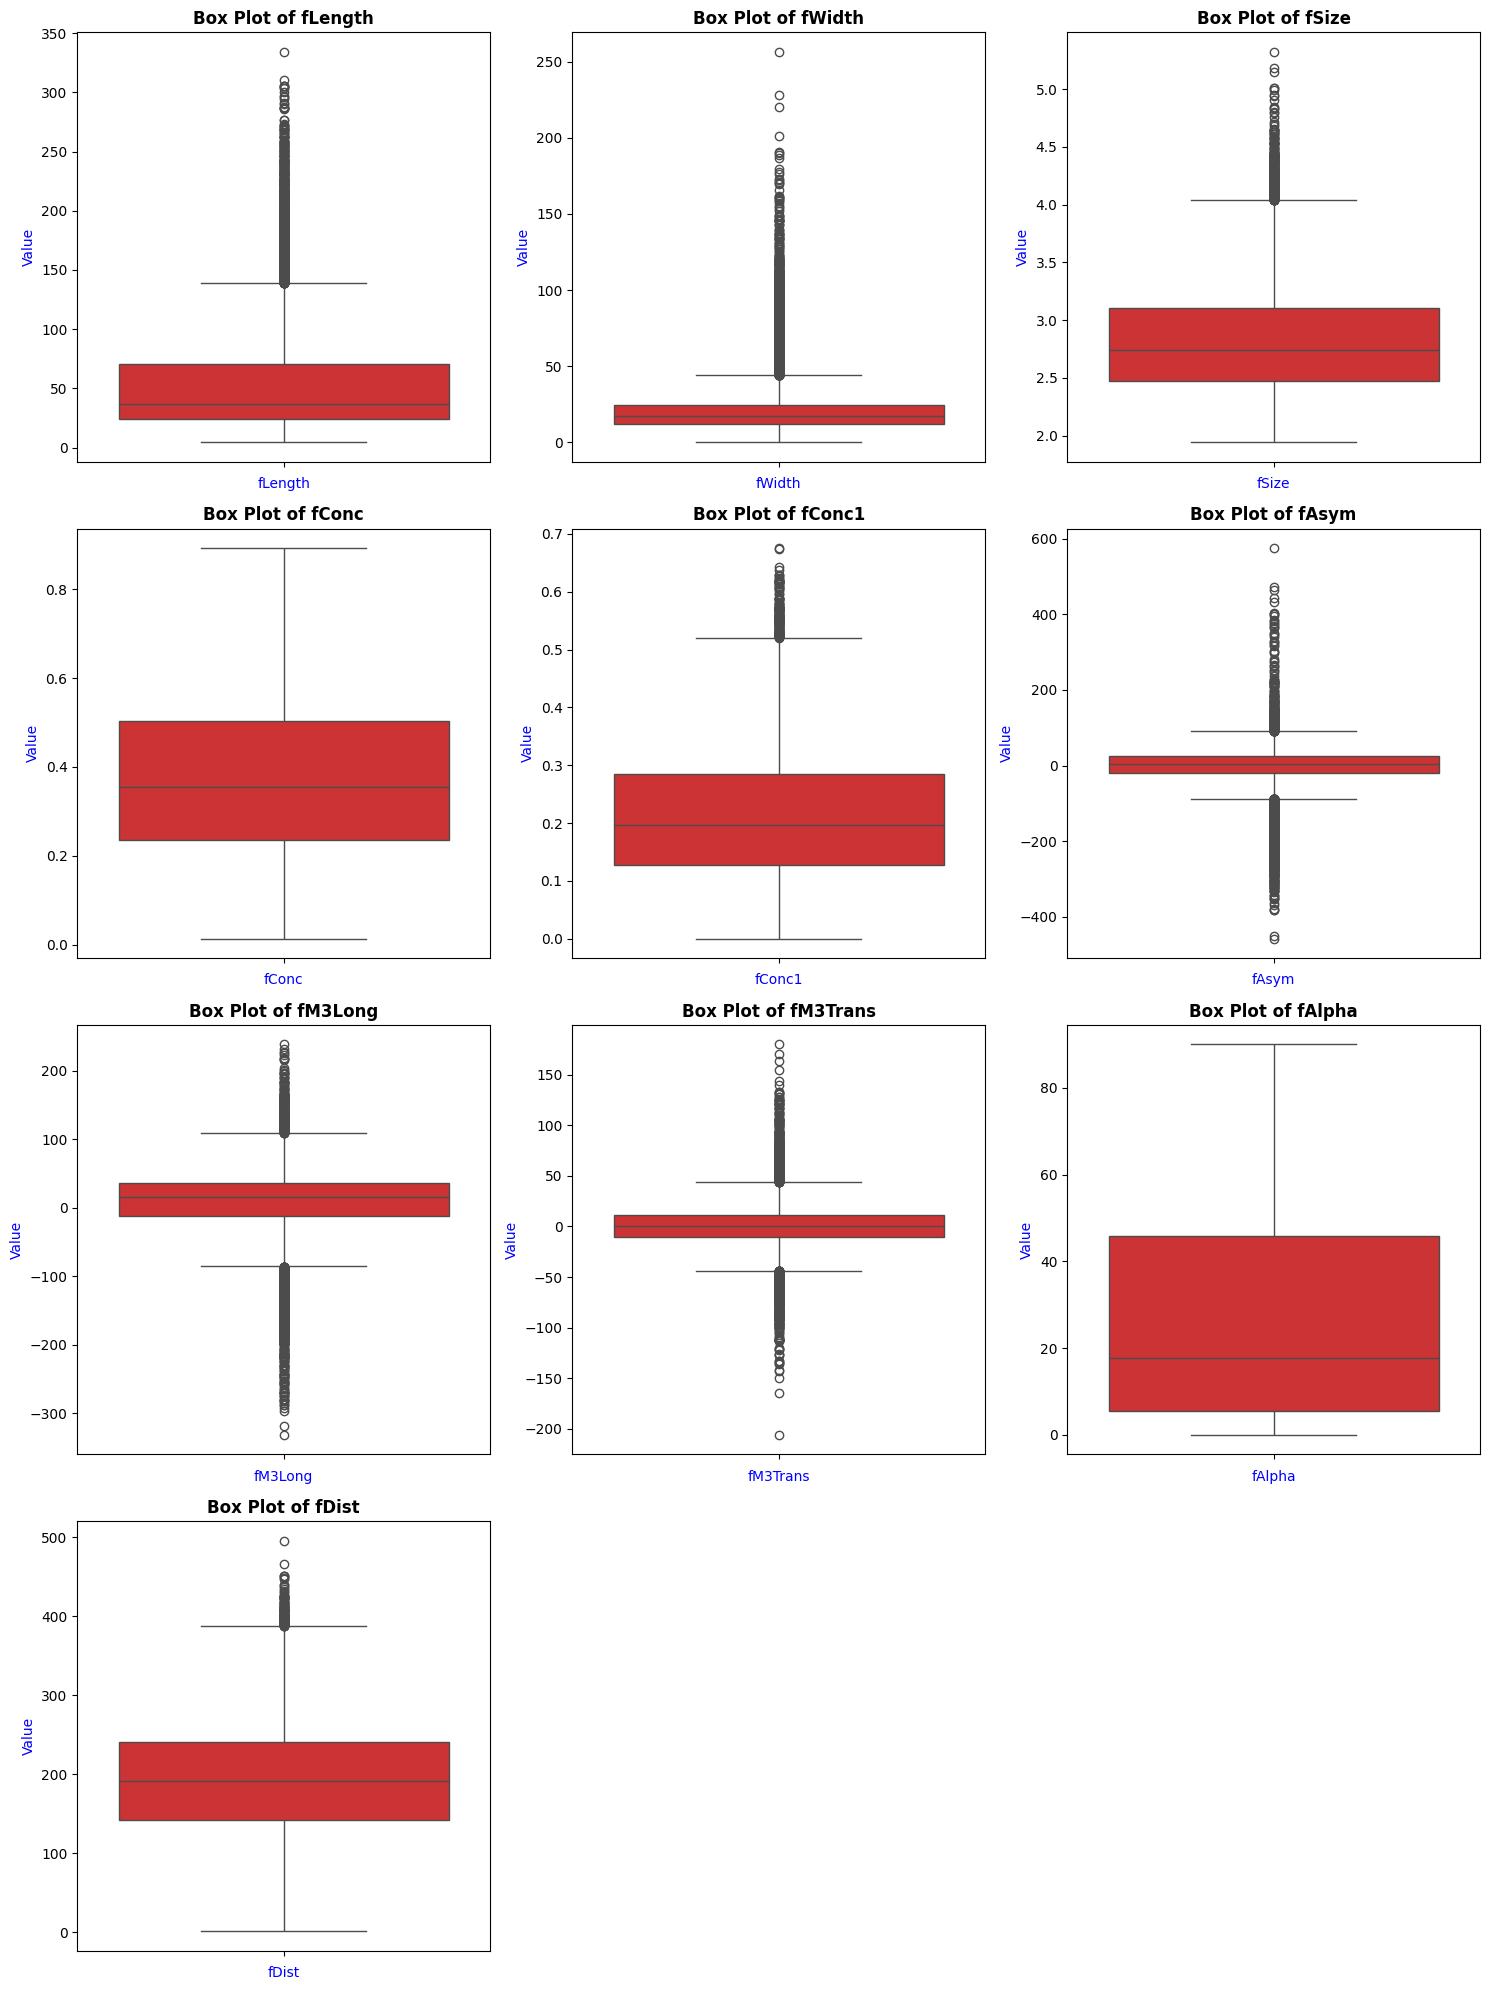

In [56]:
# List of features to create box plots for
features = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',
            'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']

# Set up the matplotlib figure
plt.figure(figsize=(15, 20))

# Create a box plot for each feature
for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=feature, data=data, palette='Set1')
    plt.title(f'Box Plot of {feature}', weight = 'bold')
    plt.xlabel(feature, color = 'blue')
    plt.ylabel('Value', color = 'blue')

plt.tight_layout()
plt.show()


* Points that lie outside the whiskers of the box plot are considered potential outliers. These are typically represented by individual dots.
* Upper Outliers: Points above the upper whisker.
*Lower Outliers: Points below the lower whisker.
* Normal Range: The whiskers typically extend to 1.5 times the interquartile range (IQR) above the third quartile and below the first quartile. Anything outside this range is flagged as a potential outlier.

# **Predict gamma ray detection: Develop a model to predict whether a gamma ray will be detected (class label) based on the given features.**

**Data Preparation**

Ensuring that the data is clean and ready for modeling then Encoding the target variable (class label) as binary (0 for h and 1 for g).

Train-Test Split: Split the data into training and testing sets.

In [57]:
''' Encoding the target variable (class)
    Split the data into features (X) and target (y)
    Split into training and testing sets (80% train, 20% test) '''

label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])
print("Encoded data:")
print(data['class'])
X = data.drop(columns=['class'])
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Encoded data:
0        0
1        0
2        0
3        0
4        0
        ..
19015    1
19016    1
19017    1
19018    1
19019    1
Name: class, Length: 19020, dtype: int64


**Note:**

0  -->  'g'\
1  -->  'h'

**Model Selection**

Starting with a simple model like Logistic Regression to establish a baselineand then implementing more complex models like Random Forest, Gradient Boosting to improve performance.
After that Evaluating models using appropriate metrics like accuracy, precision, recall, F1-score, and ROC-AUC.

In [58]:
''' Initialize the Logistic Regression model
    Train the model
    Make predictions '''

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))


Accuracy: 0.9781808622502629
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2460
           1       0.97      0.97      0.97      1344

    accuracy                           0.98      3804
   macro avg       0.98      0.98      0.98      3804
weighted avg       0.98      0.98      0.98      3804

ROC-AUC Score: 0.9770542973286875


- Precision: The ratio of true positives (correctly predicted instances) to the sum of true positives and false positives (incorrectly predicted instances).
    - Class 0: 0.99 (99% of predicted class 0 instances are correct)
    - Class 1: 0.97 (97% of predicted class 1 instances are correct)
- Recall: The ratio of true positives to the sum of true positives and false negatives (missed instances).
    - Class 0: 0.98 (98% of actual class 0 instances are correctly predicted)
    - Class 1: 0.97 (97% of actual class 1 instances are correctly predicted)
- F1-score: The harmonic mean of precision and recall.
    - Class 0: 0.98 (balance between precision and recall)
    - Class 1: 0.97 (balance between precision and recall)
- Support: The number of instances in each class.
    - Class 0: 2460 instances
    - Class 1: 1344 instances

ROC-AUC Score:

- ROC-AUC Score: 0.9770542973286875 (very close to 1, indicating excellent performance)

In [59]:
''' Initialize the Random Forest model
    Train the model
    Make predictions
    Evaluate the model '''

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_rf))


Accuracy: 0.9997371188222923
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2460
           1       1.00      1.00      1.00      1344

    accuracy                           1.00      3804
   macro avg       1.00      1.00      1.00      3804
weighted avg       1.00      1.00      1.00      3804

ROC-AUC Score: 0.9996279761904762


In [60]:
''' Gradient Boosting
  Initialize the Gradient Boosting model
  Train the model
  Make predictions
  Evaluate the model '''

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_gb))

Accuracy: 0.9997371188222923
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2460
           1       1.00      1.00      1.00      1344

    accuracy                           1.00      3804
   macro avg       1.00      1.00      1.00      3804
weighted avg       1.00      1.00      1.00      3804

ROC-AUC Score: 0.9996279761904762


**Let's proceed to test one of the models we created earlier (for example, the Random Forest model) and evaluate its performance by checking the predictions on the test set.**

In [61]:
''' Let's proceed to test one of the models we created earlier (for example, the Random Forest model)
    and evaluate its performance by checking the predictions on the test set, showing whether the model
    predicts the class of the first instance in the test set correctly. '''

# Test a single instance
sample_instance = X_test.iloc[1].values.reshape(1, -1)
predicted_class = rf_model.predict(sample_instance)
print("Predicted Class:", predicted_class)
print("Actual Class:", y_test.iloc[0])


Predicted Class: [0]
Actual Class: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [62]:
''' Here using one of the trained models (let's use the Random Forest model) to predict
    whether a new set of features corresponds to class g (gamma ray) or class h (hadron).'''

''' Prepare New Input Data
    To predict whether a new observation belongs to class g or h, you need to provide the
    input features in the same format as the training data.

    Checking the number of features in X_train
    Checking the number of features expected by the model
    Providing example input with the correct number of features (11 features)
    And then predicting the class
'''

print("Number of features in training data:", X_train.shape[1])
print("Number of features expected by the model:", rf_model.n_features_in_)
new_sample = np.array([[25.6, 5.8, 0.9, 2.4, 10.2, 7.5, 8.3, 2.2, 3.4, 1.5, 4.6]])
new_sample = new_sample.reshape(1, -1)
predicted_class = rf_model.predict(new_sample)
predicted_label = label_encoder.inverse_transform(predicted_class)
print("Predicted Class:", predicted_label[0])
print("Predicted label:", predicted_label)



Number of features in training data: 11
Number of features expected by the model: 11
Predicted Class: g
Predicted label: ['g']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [63]:
# wrapping the above snippet into a function with same input of data points.
# Making this function reusable.

def predict_with_random_forest(new_sample):

    print("Number of features in training data:", X_train.shape[1])
    print("Number of features expected by the model:", rf_model.n_features_in_)
    new_sample = np.array(new_sample).reshape(1, -1)
    predicted_class = rf_model.predict(new_sample)
    predicted_label = label_encoder.inverse_transform(predicted_class)

    print("Predicted Class:", predicted_label[0])
    return predicted_label[0]


predicted_label = predict_with_random_forest([25.6, 5.8, 0.9, 2.4, 10.2, 7.5, 8.3, 2.2, 3.4, 1.5, 4.6])
print("Predicted label is :", predicted_label)
if predicted_label == 'h':
  print("Predicted label is :", 'h')



Number of features in training data: 11
Number of features expected by the model: 11
Predicted Class: g
Predicted label is : g


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [64]:
# Predict the class label (1 for 'h', 0 for 'g')
# Decode the class label back to 'g' or 'h'

predicted_class = rf_model.predict(new_sample)
predicted_label = label_encoder.inverse_transform(predicted_class)
print(f"Predicted Class (numeric): {predicted_class[0]}")
print(f"Predicted Class (label): {predicted_label[0]}")
label_map = {'g': 'Gamma Ray', 'h': 'Hadron'}
descriptive_label = label_map[predicted_label[0]]

print(f"Predicted Class (descriptive): {descriptive_label}")


Predicted Class (numeric): 0
Predicted Class (label): g
Predicted Class (descriptive): Gamma Ray


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Code to Predict and Compare with Actual Label:**

In [65]:
# The actual label for this data point, you can compare it:
actual_label = 'g'
if predicted_label[0] == actual_label:
    print("The prediction is correct.")
else:
    print("The prediction is incorrect.")


The prediction is correct.


# **Analyze feature importance: Identifying the most important features contributing to gamma ray detection.**

Number of features expected by the model: 11
Number of features provided: 11
     Feature  Importance
0    fLength    0.758554
9      fDist    0.101353
1     fWidth    0.040044
2      fSize    0.027534
7   fM3Trans    0.026890
3      fConc    0.017552
8     fAlpha    0.006731
4     fConc1    0.006298
10      fMax    0.005306
6    fM3Long    0.005188
5      fAsym    0.004551


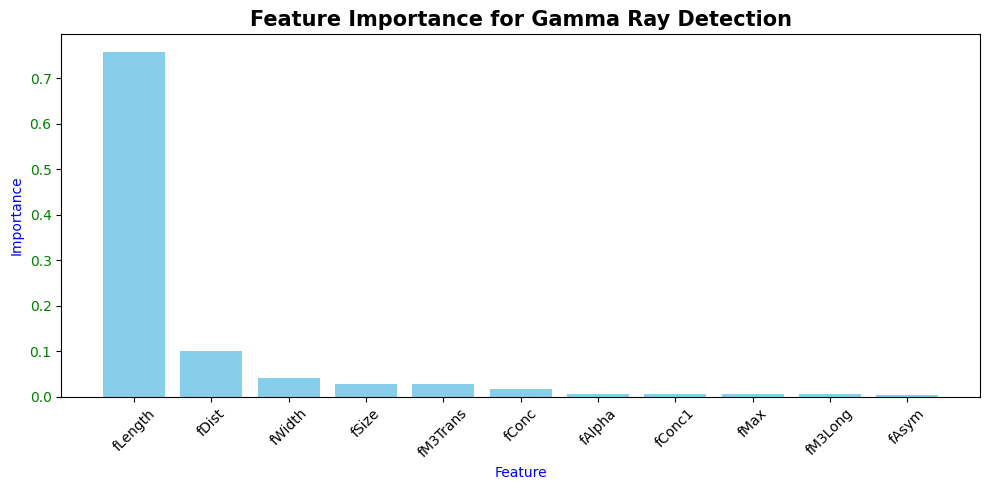

In [66]:
''' Analyzing feature importance helps you understand which features contribute the most to the model's predictions.
    For a Random Forest model, feature importance is a built-in attribute that ranks the contribution of each feature. '''

features = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'fMax']
print("Number of features expected by the model:", len(rf_model.feature_importances_))
print("Number of features provided:", len(features))

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Creating a bar plot
plt.figure(figsize=(10, 5))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance for Gamma Ray Detection', weight = 'bold', fontsize = 15)
plt.xlabel('Feature', color = 'blue')
plt.ylabel('Importance', color = 'blue')
plt.xticks(rotation=45)
plt.yticks(color = 'green')
plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()


For detecting the Gamma rays, we can conclude from the numbers and the plot that the length feature is the most important feature here to predict the gamma ray detction.

# **Applying Principal Component Analysis (PCA) to reduce the dimensionality of this data and visualize the classes in a lower-dimensional space.**

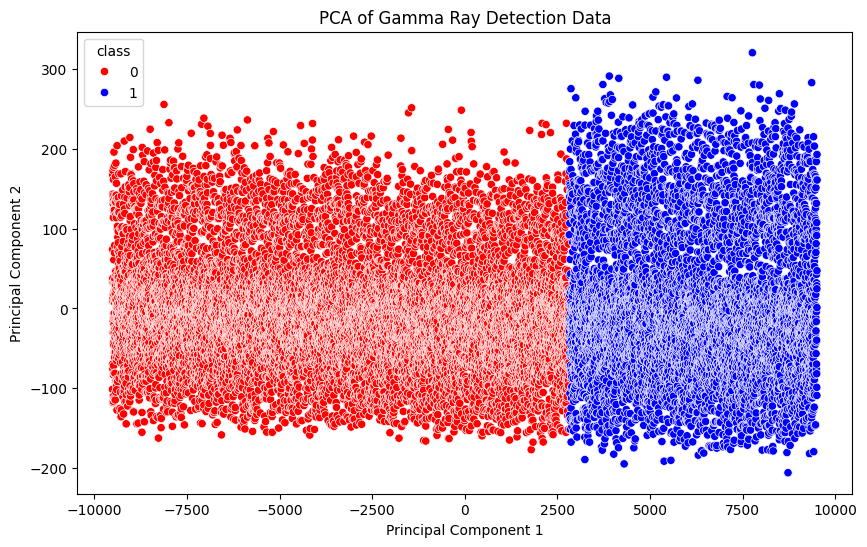

Explained Variance by Component 1: 0.9995173685023736
Explained Variance by Component 2: 0.00021467529455283075


In [67]:
''' Initialize PCA to reduce to 2 components
  Fit and transform the data
  Create a DataFrame for easy plotting '''

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['class'] = y
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='class', data=pca_df, palette=['red', 'blue'])
plt.title('PCA of Gamma Ray Detection Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

print(f"Explained Variance by Component 1: {pca.explained_variance_ratio_[0]}")
print(f"Explained Variance by Component 2: {pca.explained_variance_ratio_[1]}")


Explained Variance by Component 1: 99.95% (0.9995)\
This suggests that the first principal component captures nearly all of the variance in the data (almost 100%). It means that most of the information in the original dataset can be represented by this single component.

Explained Variance by Component 2: 0.02% (0.0002)\
This indicates that the second principal component captures a very tiny fraction of the variance. This component adds little additional information beyond what is captured by the first component.

# **Developing a model to detect anomalies in the dataset. Anomalies could be unusual or rare observations that differ significantly from the majority of the data**.

Number of anomalies detected: 951


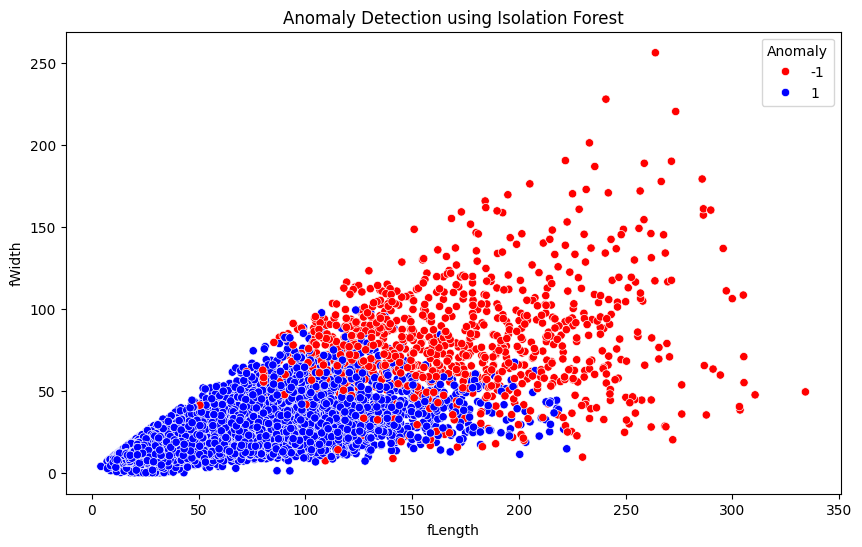

In [68]:
''' To develop a model for detecting anomalies in your dataset, I'll use methods, such as Isolation Forest,
    This techniques are effective in identifying observations that differ significantly from the majority of the data.'''

''' Initialize the Isolation Forest model
    Fit the model to the data
    Predict anomalies
   -1 for anomalies, 1 for normal points
    Add the predictions to the DataFrame
    Count the number of anomalies
    visualize the distribution of anomalies vs. normal points on specific features for ('fLength' and 'fWidth')
    contamination: This parameter controls the proportion of the dataset to be considered as anomalies.
    In this case, 5% of the data is expected to be anomalous. '''


iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X)
anomaly_pred = iso_forest.predict(X)
data['Anomaly'] = anomaly_pred
n_anomalies = np.sum(data['Anomaly'] == -1)
print(f"Number of anomalies detected: {n_anomalies}")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fLength', y='fWidth', hue='Anomaly', data=data, palette={1: 'blue', -1: 'red'})
plt.title('Anomaly Detection using Isolation Forest')
plt.show()


In [69]:
# anomalies = data[data['Anomaly'] == -1]
# print(anomalies.head())


# **Project Conclusion**

The main objective of this project was to develop a machine learning model capable of predicting whether a detected event corresponds to a gamma ray (g) or a hadron (h) based on a set of measured features.

**Exploratory Data Analysis (EDA)**\
Feature Distribution: We explored the distribution of each feature using histograms and density plots, which provided insights into the characteristics of the dataset.

**Model Development**\
Classification Models: We developed a Random Forest classifier to predict whether an event is a gamma ray or hadron. This model was chosen for its robustness and ability to handle the complex relationships between features.

Model Performance: The model was evaluated using various metrics, including accuracy, precision, recall, and the confusion matrix. These metrics demonstrated that the model performs well in classifying the events, with a strong accuracy score indicating good predictive performance.

Feature Importance: We identified the most important features contributing to the detection of gamma rays using the feature importance scores from the Random Forest model. This analysis revealed which features had the most significant impact on the model's predictions.

**Anomaly Detection**
Isolation Forest: We implemented an Isolation Forest model to detect anomalies within the dataset. The model identified 951 data points as potential anomalies. These anomalies could represent unusual events, errors in data collection, or rare occurrences that differ significantly from the norm.

**Dimensionality Reduction**\
Principal Component Analysis (PCA): We used PCA to reduce the dimensionality of the dataset and visualize the data in a lower-dimensional space. The first two principal components explained the majority of the variance in the data, allowing us to visualize how the classes are separated in this reduced space.
